# Реализация модернизированной FCN сети
В этом уроке мы создадим модернизированную FCN модель с использованием изученных слоёв, которая потенциально должна выдвать более высокое качество на реальных задачах по семантической сегментации.

### Загрузка необходимых библиотек
Здесь мы загружаем разоичные библиотеки, включая TensoFlow.


In [1]:
import numpy as np

import tensorflow as tf
# tf.enable_eager_execution()
print('TensorFlow version:', tf.__version__)

2022-04-26 18:30:47.642212: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


TensorFlow version: 2.4.1


### Создание FCN модели
Для создания модели создадим собственный класс, наследованный от `tf.keras.Model`.
Ранее мы использовали лишь свёртки и пулинги для извлечения признаков и понижения пространственных размерностий. Это был наш Энкодер. В качестве Декодера у нас был простой Upscale слой, который просто расширял изображение до нужного размера. Теперь же давайте реализуем более качественный Декодер с использованием слоёв для повышения разрешения.

В примере ниже будем использовать Unpooling (в керасе это делает слой `tf.keras.layers.UpSampling2D`) перемежающиийся со свёрточными слоями.

In [2]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu') 
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')        
        self.conv3 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')        
        self.conv5 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        self.conv6 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')    
        
        self.conv7 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv8 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')        
        self.conv9 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv10 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv11 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')
        
        self.pool = tf.keras.layers.MaxPool2D((2, 2))
        self.unpool = tf.keras.layers.UpSampling2D((2, 2))
                
    def call(self, x):
      
        # Encoder
        out = self.conv1(x) # (1, 256, 256, 64)
        out = self.conv2(out) # (1, 256, 256, 64)
        out = self.pool(out) # (1, 128, 128, 64)       
        out = self.conv3(out) # (1, 128, 128, 128)
        out = self.conv4(out) # (1, 128, 128, 128)
        out = self.pool(out) # (1, 64, 64, 128)       
        out = self.conv5(out) # (1, 64, 64, 256)
        out = self.conv6(out) # (1, 64, 64, 256)
        
        # Decoder        
        out = self.unpool(out) # (1, 128, 128, 256)       
        out = self.conv7(out) # (1, 128, 128, 128)
        out = self.conv8(out) # (1, 128, 128, 128)
        out = self.unpool(out) # (1, 256, 256, 128)        
        out = self.conv9(out) # (1, 256, 256, 64)
        out = self.conv10(out) # (1, 256, 256, 64)
        out = self.conv11(out) # (1, 256, 256, 1)

        return out
    
model = Model()

2022-04-26 18:47:32.653673: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-26 18:47:32.656055: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-26 18:47:32.697123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 18:47:32.698360: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.7845GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2022-04-26 18:47:32.698411: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-26 18:47:32.767485: I tensorflow/stream_executor/platfo

### Задания


**[ЗАДАНИЕ 1]** Для такой модели для каждого промежуточного тензора с картами признаков укажите его размерности. Другими словами, для каждого вычисленного тензора `out` в каждой строчке функции `call()` выпишите его размерность, основываясь лишь на числах из конструктора. Размерность тензора `x` считать равной [1, 256, 256, 3]


**[ЗАДАНИЕ 2]** Создайте новую модель, аналогичную описанной выше, в котрой замените все Pooling слои на свёрточные слои со страйдом 2

In [3]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu') 
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv2_1 = tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu')
        self.conv3 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')  
        self.conv4_1 = tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu')
        self.conv5 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        self.conv6 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')    
        
        self.conv7 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv8 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')        
        self.conv9 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv10 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv11 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')
        
        self.pool = tf.keras.layers.MaxPool2D((2, 2))
        self.unpool = tf.keras.layers.UpSampling2D((2, 2))
                
    def call(self, x):
      
        # Encoder
        out = self.conv1(x) # (1, 256, 256, 64)
        out = self.conv2(out) # (1, 256, 256, 64)
        out = self.conv2_1(out) # (1, 128, 128, 64)       
        out = self.conv3(out) # (1, 128, 128, 128)
        out = self.conv4(out) # (1, 128, 128, 128)
        out = self.conv4_1(out) # (1, 64, 64, 128)       
        out = self.conv5(out) # (1, 64, 64, 256)
        out = self.conv6(out) # (1, 64, 64, 256)
        
        # Decoder        
        out = self.unpool(out) # (1, 128, 128, 256)       
        out = self.conv7(out) # (1, 128, 128, 128)
        out = self.conv8(out) # (1, 128, 128, 128)
        out = self.unpool(out) # (1, 256, 256, 128)        
        out = self.conv9(out) # (1, 256, 256, 64)
        out = self.conv10(out) # (1, 256, 256, 64)
        out = self.conv11(out) # (1, 256, 256, 1)

        return out
    
model = Model()


**[ЗАДАНИЕ 3]** Реализуйте одну из написанных моделей (исходную или из Задания 2) с помощью функционального API кераса. Входом в модель сделайте узел `tf.keras.layers.Input((256, 256, 3))`. После этого визуализализируйте полученную модель с помощью `tf.keras.utils.plot_model(model, show_shapes=True)`. Проверьте размерности выходов всех слоёв, сравние с ответом из Задания 1.

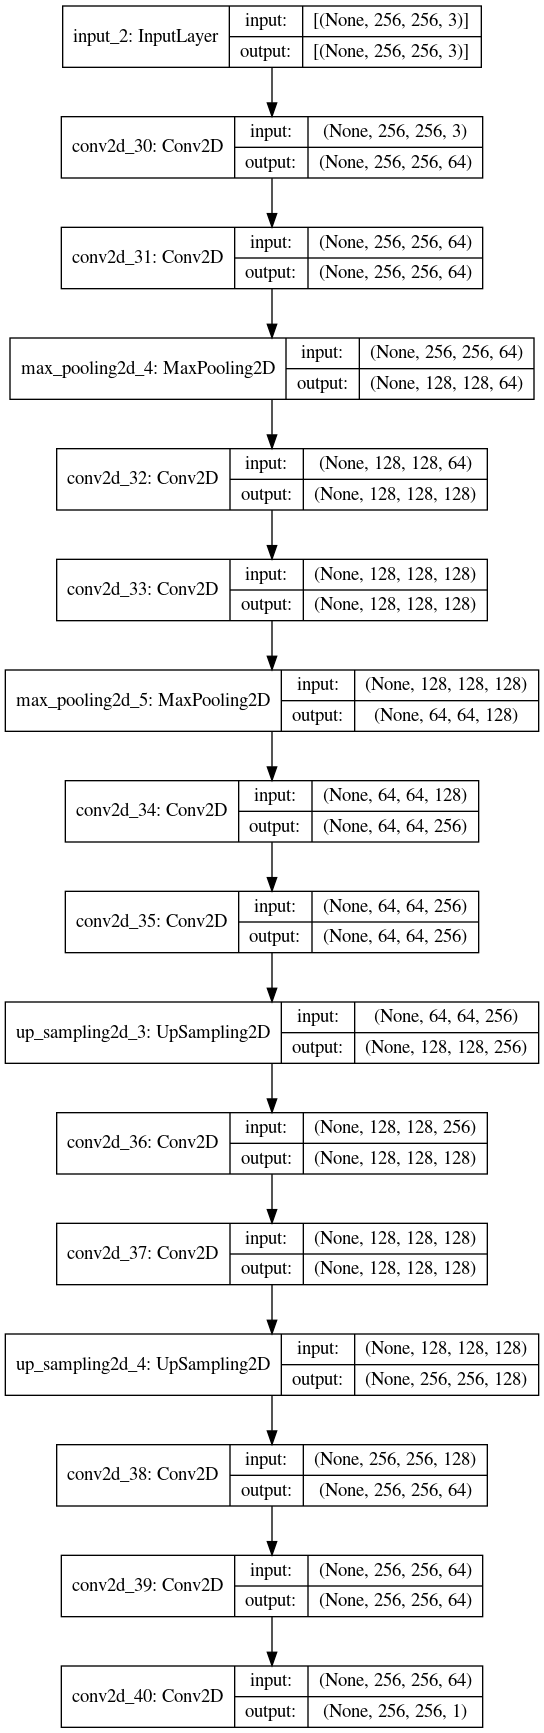

In [5]:
input_layer = tf.keras.layers.Input((256, 256, 3))
conv1_out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
conv2_out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(conv1_out)
pool1_out = tf.keras.layers.MaxPool2D((2, 2))(conv2_out)
conv3_out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(pool1_out)
conv4_out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(conv3_out)
pool2_out = tf.keras.layers.MaxPool2D((2, 2))(conv4_out)
conv5_out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(pool2_out)
conv6_out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(conv5_out)
unpool1_out = tf.keras.layers.UpSampling2D((2, 2))(conv6_out)
conv7_out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(unpool1_out)
conv8_out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(conv7_out)
unpool2_out = tf.keras.layers.UpSampling2D((2, 2))(conv8_out)
conv9_out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(unpool2_out)
conv10_out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(conv9_out)
conv11_out = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(conv10_out)

model = tf.keras.Model(inputs=input_layer, outputs=conv11_out)

tf.keras.utils.plot_model(model, show_shapes=True)


**[ЗАДАНИЕ 4]** Реализуйте пайплайн обучения для такой модели (одной из): подготовка данных, лосс, обучение, тестирование. Используйте материалы из предыдущего практического урока. Обучите модель и сравните время обучения с временем обучения простой FCN из предыдущего урока.

In [6]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

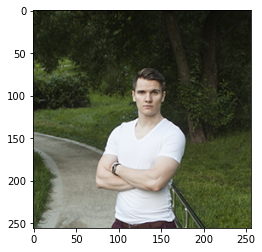

In [9]:
img = imageio.imread('6.11_me_256.png')
img = img.astype(np.float32) / 255.
_ = plt.imshow(img)

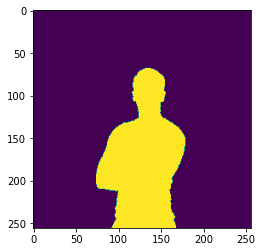

In [11]:
gt = imageio.imread('6.11_me_gt_256.png')
gt = gt.astype(np.float32) / 255.
gt = np.mean(gt, axis=2)[...,None]
_ = plt.imshow(gt[...,0])

In [12]:
train_x = np.stack((img, img[:, ::-1, :]))
train_y = np.stack((gt, gt[:, ::-1, :]))

In [14]:
%%time
NUM_EPOCHS = 100
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=optimizer, loss=loss)

history = model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/100
1/1 [==============================] - 1s 793ms/step - loss: 0.0517
Epoch 2/100
1/1 [==============================] - 0s 80ms/step - loss: 3.5059
Epoch 3/100
1/1 [==============================] - 0s 81ms/step - loss: 0.0924
Epoch 4/100
1/1 [==============================] - 0s 79ms/step - loss: 0.3379
Epoch 5/100
1/1 [==============================] - 0s 78ms/step - loss: 0.5751
Epoch 6/100
1/1 [==============================] - 0s 79ms/step - loss: 0.7326
Epoch 7/100
1/1 [==============================] - 0s 77ms/step - loss: 0.8640
Epoch 8/100
1/1 [==============================] - 0s 78ms/step - loss: 0.8772
Epoch 9/100
1/1 [==============================] - 0s 78ms/step - loss: 0.7906
Epoch 10/100
1/1 [==============================] - 0s 78ms/step - loss: 0.6603
Epoch 11/100
1/1 [==============================] - 0s 77ms/step - loss: 0.5296
Epoch 12/100
1/1 [==============================] - 0s 75ms/step - loss: 0.4227
Epoch 13/100
1/1 [==============================

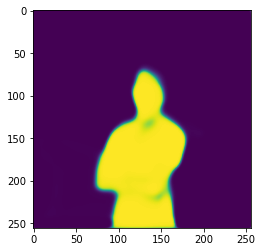

In [17]:
out = model.predict(img[None, ...])
_ = plt.imshow(out[0, ..., 0])

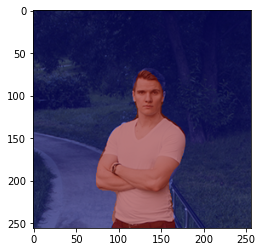

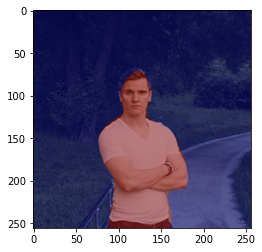

In [18]:
for sample in train_x:
    out = model.predict(sample[None, ...])
    seg_map = (out[0, ..., 0]>0.5).astype(np.float32)
    seg_map_clr = plt.get_cmap('jet')(seg_map)[..., :3]
    plt.imshow(sample*0.5 + seg_map_clr*0.5)
    plt.show()